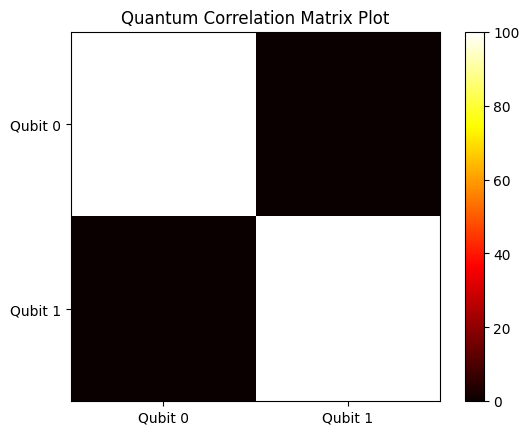

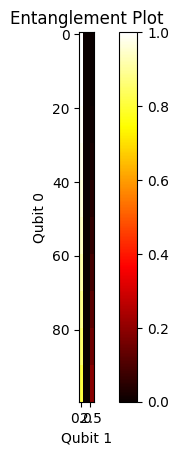

In [6]:
#Quantum entanglement plot
#This type of plot is useful for visualizing the degree of entanglement between two qubits in a quantum state, without relying on the Bloch sphere representation of individual qubits.

#Quantum correlation matrix plot. 
#This type of plot is useful for visualizing the correlations between two qubits in a quantum state and 
#can help to demonstrate the concept of entanglement
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt

# initialize the device
dev = qml.device("default.qubit", wires=2)

# define the quantum circuit
@qml.qnode(dev)
def circuit(params):
    qml.RY(params[0], wires=0)
    qml.CNOT(wires=[0, 1])
    qml.RZ(params[1], wires=1)
    return qml.probs(wires=[0, 1])

# create a range of parameter values for the circuit
params = [[0.1*i, 0.1*j] for i in range(10) for j in range(10)]

# evaluate the circuit for each set of parameters
probs = np.array([circuit(p) for p in params])

# create the correlation matrix
corr_mat = np.zeros((2, 2))
corr_mat[0, 0] = probs[:, 0].sum() + probs[:, 3].sum()
corr_mat[0, 1] = probs[:, 1].sum() + probs[:, 2].sum()
corr_mat[1, 0] = probs[:, 1].sum() + probs[:, 2].sum()
corr_mat[1, 1] = probs[:, 0].sum() + probs[:, 3].sum()

# create the correlation matrix plot
plt.figure()
plt.imshow(corr_mat, cmap='hot', interpolation='nearest')
plt.xticks([0, 1], ['Qubit 0', 'Qubit 1'])
plt.yticks([0, 1], ['Qubit 0', 'Qubit 1'])
plt.title('Quantum Correlation Matrix Plot')
plt.colorbar()
plt.show()

# create the entanglement plot
plt.figure()
plt.imshow(probs, cmap='hot', interpolation='nearest')
plt.xlabel('Qubit 1')
plt.ylabel('Qubit 0')
plt.title('Entanglement Plot')
plt.colorbar()
plt.show()
